In [1]:
# Remember to update your path
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append('/home/runmin/Documents/Qishi/QishiQR')

from Backtesting.Vectorized.cross_compare import *
from Backtesting.Vectorized.models import *

from Utils.lm import gen_strategy, LM_model
from Utils.MajorContract_Offsets import MajorContracts
from Utils.MajorContract_split import MajorContracts


import warnings
warnings.filterwarnings(action='ignore')


from config import RbConfig

def Generate_Direction(mj, threshold = np.linspace(1,15,num=(15.-1)/2+1)):
    result = pd.DataFrame(index=mj.index)
    for thx in threshold:
        result[round(thx,1)] = mj['LastPrice'].diff().apply(lambda x: 2 if x > thx 
                                            else (1 if x < -thx else 0))
    return result
 

----

# 1. Price-change 

In [4]:

# ====== Initial Configuration - Rb 5min ========
params = RbConfig(frequency=5)

mj5 = MajorContracts(symbol=params.symbol, split_time=params.split, topdir=params.tick_path, 
                       maturity=params.maturity, 
                       transitions=params.transition,
                       freq=params.frequency, offset=params.offset)

mj_train_5, mj_test_5, ptb_5 = mj5.create_major_overlap()

PT_5 = Generate_Direction(mj_train_5)
Frequency_Count = PT_5.apply(pd.value_counts).T

Value_Prob_5 = PT_5.apply(pd.value_counts).T
Value_Prob_5 = Value_Prob_5.div(Value_Prob_5.sum(axis=1), axis=0)

rb1605 /home/runmin/Documents/Qishi/tick2016//rb
0
ID trade_range transition_begin transition_end
1605 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-03-01 00:00:00
probability table:  20160104.0 20160229.0
rb1610 /home/runmin/Documents/Qishi/tick2016//rb
0
ID trade_range transition_begin transition_end
1610 ['2016-2-1', '2016-8-1'] 2016-03-01 00:00:00 2016-07-01 00:00:00
probability table:  20160301.0 20160630.0
rb1701 /home/runmin/Documents/Qishi/tick2016//rb
0
ID trade_range transition_begin transition_end
1701 ['2016-6-1', '2016-12-15'] 2016-07-01 00:00:00 2016-12-01 00:00:00
probability table:  20160701.0 20160729.0
rb1705 /home/runmin/Documents/Qishi/tick2016//rb
0
ID trade_range transition_begin transition_end
1705 ['2016-10-15', '2017-1-31'] 2016-12-01 00:00:00 2016-12-31 00:00:00


In [6]:
# ====== Initial Configuration - Rb 10min ========
params = RbConfig(frequency=10)

mj10 = MajorContracts(symbol=params.symbol, split_time=params.split, topdir=params.tick_path, 
                       maturity=params.maturity, 
                       transitions=params.transition,
                       freq=params.frequency, offset=params.offset)

mj_train_10, mj_test_10, ptb_10 = mj10.create_major_overlap()

PT_10 = Generate_Direction(mj_train_10)
Frequency_Count = PT_10.apply(pd.value_counts).T

Value_Prob_10 = PT_10.apply(pd.value_counts).T
Value_Prob_10 = Value_Prob_10.div(Value_Prob_10.sum(axis=1), axis=0)

rb1605 /home/runmin/Documents/Qishi/tick2016//rb
0
ID trade_range transition_begin transition_end
1605 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-03-01 00:00:00
probability table:  20160104.0 20160229.0
rb1610 /home/runmin/Documents/Qishi/tick2016//rb
0
ID trade_range transition_begin transition_end
1610 ['2016-2-1', '2016-8-1'] 2016-03-01 00:00:00 2016-07-01 00:00:00
probability table:  20160301.0 20160630.0
rb1701 /home/runmin/Documents/Qishi/tick2016//rb
0
ID trade_range transition_begin transition_end
1701 ['2016-6-1', '2016-12-15'] 2016-07-01 00:00:00 2016-12-01 00:00:00
probability table:  20160701.0 20160729.0
rb1705 /home/runmin/Documents/Qishi/tick2016//rb
0
ID trade_range transition_begin transition_end
1705 ['2016-10-15', '2017-1-31'] 2016-12-01 00:00:00 2016-12-31 00:00:00


In [7]:
# ====== Initial Configuration - Bu 15min ========
params = RbConfig(frequency=15)

mj15 = MajorContracts(symbol=params.symbol, split_time=params.split, topdir=params.tick_path, 
                       maturity=params.maturity, 
                       transitions=params.transition,
                       freq=params.frequency, offset=params.offset)

mj_train_15, mj_test_15, ptb_15 = mj15.create_major_overlap()

PT_15 = Generate_Direction(mj_train_15)
Frequency_Count = PT_5.apply(pd.value_counts).T

Value_Prob_15 = PT_15.apply(pd.value_counts).T
Value_Prob_15 = Value_Prob_15.div(Value_Prob_15.sum(axis=1), axis=0)

rb1605 /home/runmin/Documents/Qishi/tick2016//rb
0
ID trade_range transition_begin transition_end
1605 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-03-01 00:00:00
probability table:  20160104.0 20160229.0
rb1610 /home/runmin/Documents/Qishi/tick2016//rb
0
ID trade_range transition_begin transition_end
1610 ['2016-2-1', '2016-8-1'] 2016-03-01 00:00:00 2016-07-01 00:00:00
probability table:  20160301.0 20160630.0
rb1701 /home/runmin/Documents/Qishi/tick2016//rb
0
ID trade_range transition_begin transition_end
1701 ['2016-6-1', '2016-12-15'] 2016-07-01 00:00:00 2016-12-01 00:00:00
probability table:  20160701.0 20160729.0
rb1705 /home/runmin/Documents/Qishi/tick2016//rb
0
ID trade_range transition_begin transition_end
1705 ['2016-10-15', '2017-1-31'] 2016-12-01 00:00:00 2016-12-31 00:00:00


## 1.1 Compare the probability of price change

Text(0.5,0,'Price threshold')

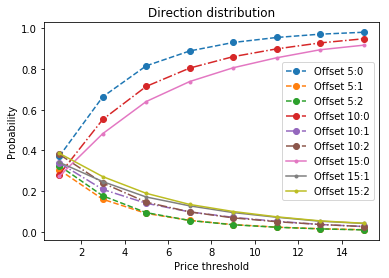

In [8]:
fig = plt.figure()
ax = plt.gca()
Value_Prob_5.plot(ax = ax, marker='o', style='--')
legend_5 = ['Offset 5:{}'.format(x) for x in [0,1,2]]
Value_Prob_10.plot(ax = ax, marker='o', style='-.')
legend_10 = ['Offset 10:{}'.format(x) for x in [0,1,2]]
Value_Prob_15.plot(ax = ax, marker='.')
legend_15 = ['Offset 15:{}'.format(x) for x in [0,1,2]]

plt.legend(legend_5+legend_10+legend_15)
ax.set_title('Direction distribution')
ax.set_ylabel('Probability')
ax.set_xlabel('Price threshold')

-----

# 2. Check the probability table

In [9]:
ptb_5_df = pd.concat(ptb_5)
ptb_5_df.index = ptb_5_df.index.droplevel(level=0)
ptb_5_df['len'] = ptb_5_df.prior.apply(len)

for prior_len in range(2, params.max_model_order+2):
    tmp = ptb_5_df[ptb_5_df['len']==prior_len].loc[:,'max'].value_counts()
    print('='*50)
    print()
    print('Prior length:{}'.format(prior_len),'\t0,1,2:',tmp.values/tmp.values.sum())


Prior length:2 	0,1,2: [0.66666667 0.33333333]

Prior length:3 	0,1,2: [0.55555556 0.40740741 0.03703704]

Prior length:4 	0,1,2: [0.54320988 0.44444444 0.01234568]

Prior length:5 	0,1,2: [0.50205761 0.42798354 0.06995885]

Prior length:6 	0,1,2: [0.4266118  0.38683128 0.18655693]

Prior length:7 	0,1,2: [0.37219936 0.34979424 0.2780064 ]

Prior length:8 	0,1,2: [0.5887822  0.22801402 0.18320378]


In [10]:
ptb_10_df = pd.concat(ptb_10)
ptb_10_df.index = ptb_10_df.index.droplevel(level=0)
ptb_10_df['len'] = ptb_10_df.prior.apply(len)

for prior_len in range(2, params.max_model_order+2):
    tmp = ptb_10_df[ptb_10_df['len']==prior_len].loc[:,'max'].value_counts()
    print('='*50)
    print()
    print('Prior length:{}'.format(prior_len),'\t0,1,2:',tmp.values/tmp.values.sum())


Prior length:2 	0,1,2: [0.77777778 0.22222222]

Prior length:3 	0,1,2: [0.62962963 0.37037037]

Prior length:4 	0,1,2: [0.56790123 0.40740741 0.02469136]

Prior length:5 	0,1,2: [0.47325103 0.41563786 0.11111111]

Prior length:6 	0,1,2: [0.37311385 0.34293553 0.28395062]

Prior length:7 	0,1,2: [0.52080476 0.25057156 0.22862369]

Prior length:8 	0,1,2: [0.72656607 0.14616674 0.12726718]


In [11]:
ptb_15_df = pd.concat(ptb_15)
ptb_15_df.index = ptb_15_df.index.droplevel(level=0)
ptb_15_df['len'] = ptb_15_df.prior.apply(len)

for prior_len in range(2, params.max_model_order+2):
    tmp = ptb_15_df[ptb_15_df['len']==prior_len].loc[:,'max'].value_counts()
    print('='*50)
    print()
    print('Prior length:{}'.format(prior_len),'\t0,1,2:',tmp.values/tmp.values.sum())


Prior length:2 	0,1,2: [0.55555556 0.44444444]

Prior length:3 	0,1,2: [0.7037037 0.2962963]

Prior length:4 	0,1,2: [0.54320988 0.41975309 0.03703704]

Prior length:5 	0,1,2: [0.4526749 0.3909465 0.1563786]

Prior length:6 	0,1,2: [0.3648834 0.3484225 0.2866941]

Prior length:7 	0,1,2: [0.57567444 0.2258802  0.19844536]

Prior length:8 	0,1,2: [0.76299345 0.12513336 0.11187319]


# 3. Check the generated signal

In [14]:
params = RbConfig(frequency=5)

slm_5 = ptb_5_df.groupby(['prior']).sum().reset_index()
slm_5['signal'] = slm_5.loc[:, '0':'2'].idxmax(axis=1)

signal_5 = MajorSeriesTest(mj_test_5, params.output_path, slm_5)
signal_5.build( params.max_model_order, params.offset, params.start.strftime("%Y%m%d"), params.end.strftime("%Y%m%d"), params.tca)

print('Interval time {}min'.format(params.frequency))
for model_order in range(1, params.max_model_order):
    tmp = signal_5.signals[model_order].signal.value_counts()
    print('='*50)
    print('Prior length:{}'.format(model_order+1),'\t0,1,2:',tmp.values/tmp.values.sum())

Interval time 5min
Prior length:2 	0,1,2: [0.53827519 0.46172481]
Prior length:3 	0,1,2: [0.52810078 0.46802326 0.00387597]
Prior length:4 	0,1,2: [0.54215116 0.45687984 0.00096899]
Prior length:5 	0,1,2: [0.50557171 0.48570736 0.00872093]
Prior length:6 	0,1,2: [0.50775194 0.46051357 0.0317345 ]
Prior length:7 	0,1,2: [0.45300388 0.44840116 0.09859496]


In [15]:
params = RbConfig(frequency=10)

slm_10 = ptb_10_df.groupby(['prior']).sum().reset_index()
slm_10['signal'] = slm_10.loc[:, '0':'2'].idxmax(axis=1)

signal_10 = MajorSeriesTest(mj_test_10, params.output_path, slm_10)
signal_10.build( params.max_model_order, params.offset, params.start.strftime("%Y%m%d"), params.end.strftime("%Y%m%d"), params.tca)

print('Interval time {}min'.format(params.frequency))
for model_order in range(1, params.max_model_order):
    tmp = signal_10.signals[model_order].signal.value_counts()
    print('='*50)
    print('Prior length:{}'.format(model_order+1),'\t0,1,2:',tmp.values/tmp.values.sum())

Interval time 10min
Prior length:2 	0,1,2: [0.7596607 0.2403393]
Prior length:3 	0,1,2: [0.68378888 0.31526861 0.00094251]
Prior length:4 	0,1,2: [0.68803016 0.31055608 0.00141376]
Prior length:5 	0,1,2: [0.61639962 0.36993402 0.01366635]
Prior length:6 	0,1,2: [0.52921772 0.41187559 0.05890669]
Prior length:7 	0,1,2: [0.43779453 0.42554194 0.13666352]


In [13]:
params = RbConfig(frequency=15)

slm_15 = ptb_15_df.groupby(['prior']).sum().reset_index()
slm_15['signal'] = slm_15.loc[:, '0':'2'].idxmax(axis=1)

signal_15 = MajorSeriesTest(mj_test_15, params.output_path, slm_15)
signal_15.build( params.max_model_order, params.offset, params.start.strftime("%Y%m%d"), params.end.strftime("%Y%m%d"), params.tca)

print('Interval time {}min'.format(params.frequency))
for model_order in range(1, params.max_model_order):
    tmp = signal_15.signals[model_order].signal.value_counts()
    print('='*50)
    print('Prior length:{}'.format(model_order+1),'\t0,1,2:',tmp.values/tmp.values.sum())

Interval time 15min
Prior length:2 	0,1,2: [0.75268097 0.24731903]
Prior length:3 	0,1,2: [0.74329759 0.25536193 0.00134048]
Prior length:4 	0,1,2: [0.60455764 0.39410188 0.00134048]
Prior length:5 	0,1,2: [0.5308311  0.39008043 0.07908847]
Prior length:6 	0,1,2: [0.51407507 0.39075067 0.09517426]
Prior length:7 	0,1,2: [0.4041555  0.39142091 0.20442359]


----
# Backtest

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.241090,0.008286,-0.002565,0.001513,0.000217,-0.021996,0.019124,-0.053423,0.589716,8.592729,2218,1.480617,0.642471
1,0.240440,0.007882,-0.002563,0.001512,0.000201,-0.022401,0.019124,-0.038599,0.589894,8.195307,2272,1.457151,0.628521
2,0.285152,0.007644,-0.002759,0.001554,0.000218,-0.020784,0.019124,-0.054129,0.563375,6.701906,2031,1.443367,0.646480
3,0.281505,0.007214,-0.002586,0.001600,0.000193,-0.020784,0.019124,-0.052785,0.618416,6.406707,2170,1.418417,0.619816
4,0.290170,0.004611,-0.002440,0.001718,0.000129,-0.020017,0.025136,-0.065759,0.704064,3.972721,2073,1.267441,0.584178
5,0.262437,0.001384,-0.002261,0.001850,0.000038,-0.016651,0.015405,-0.157580,0.818234,1.318462,2119,1.080275,0.515337
6,0.278660,0.000551,-0.002236,0.001838,0.000014,-0.016651,0.025136,-0.106750,0.821942,0.494573,2245,1.031974,0.509577


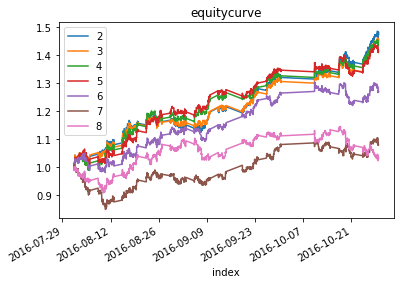

In [25]:
from config import RbConfig
params=RbConfig(frequency=5)

Rb_5_test = MajorSeriesTest(mj_test_5, params.output_path, slm_5 )
Rb_5_test.build(model_order=params.max_model_order, freq=params.frequency, 
               start=params.start.strftime("%Y%m%d"), end=params.end.strftime("%Y%m%d"))

Rb_5_test.run()
Rb_5_test.plot()
Rb_5_test.performance

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.276370,0.002242,-0.003650,0.001991,0.000114,-0.025190,0.018423,-0.088537,0.545438,2.028215,1142,1.130045,0.619089
1,0.226525,0.003049,-0.004954,0.002825,0.000299,-0.023916,0.018428,-0.060852,0.570241,3.364771,592,1.176832,0.641892
2,0.277574,0.001221,-0.003537,0.002545,0.000081,-0.027204,0.018423,-0.116658,0.719406,1.099552,879,1.070808,0.575654
3,0.296689,0.003269,-0.003334,0.002740,0.000205,-0.028053,0.022473,-0.092954,0.822016,2.754423,923,1.189592,0.554713
4,0.232971,0.003838,-0.003280,0.002844,0.000253,-0.025190,0.016302,-0.089779,0.867221,4.118073,880,1.222579,0.548864
5,0.207778,0.003047,-0.002963,0.002754,0.000164,-0.019660,0.022473,-0.069007,0.929218,3.666567,1076,1.176745,0.516729
6,0.273888,0.003208,-0.002813,0.002780,0.000156,-0.017575,0.022473,-0.073296,0.988371,2.928027,1190,1.186053,0.495798


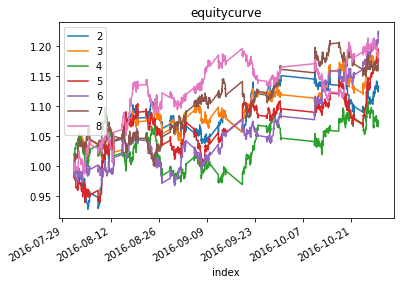

In [26]:
params=RbConfig(frequency=10)

Rb_10_test = MajorSeriesTest(mj_test_10, params.output_path, slm_10 )
Rb_10_test.build(model_order=params.max_model_order, freq=params.frequency, 
               start=params.start.strftime("%Y%m%d"), end=params.end.strftime("%Y%m%d"))

Rb_10_test.run()
Rb_10_test.plot()
Rb_10_test.performance

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.289173,0.001744,-0.004574,0.002480,0.000129,-0.023916,0.017563,-0.152101,0.542142,1.507364,786,1.101126,0.622137
1,0.265363,-0.000573,-0.005828,0.003287,-0.000076,-0.030527,0.017671,-0.168110,0.564055,-0.540066,437,0.966751,0.617849
2,0.286256,-0.000106,-0.004656,0.003389,-0.000011,-0.023916,0.019135,-0.223216,0.728009,-0.092911,551,0.993830,0.542650
3,0.242807,0.000112,-0.003645,0.003085,0.000008,-0.021435,0.027116,-0.158187,0.846373,0.115077,771,1.006482,0.508431
4,0.283703,0.000909,-0.003533,0.003247,0.000064,-0.020177,0.027116,-0.198509,0.919225,0.801445,828,1.052750,0.479469
5,0.283691,0.003162,-0.003471,0.003425,0.000233,-0.025222,0.027116,-0.101059,0.986584,2.786644,788,1.183406,0.488579
6,0.293123,0.000598,-0.003682,0.003417,0.000041,-0.024411,0.030112,-0.128234,0.927998,0.509739,847,1.034665,0.468713


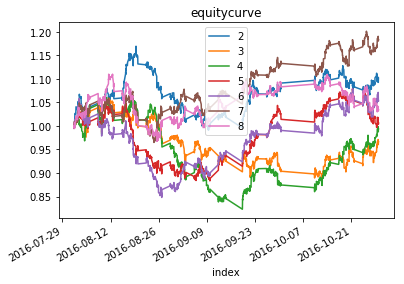

In [29]:
params=RbConfig(frequency=15)

Rb_15_test = MajorSeriesTest(mj_test_15, params.output_path, slm_15 )
Rb_15_test.build(model_order=params.max_model_order, freq=params.frequency, 
               start=params.start.strftime("%Y%m%d"), end=params.end.strftime("%Y%m%d"))

Rb_15_test.run()
Rb_15_test.plot()
Rb_15_test.performance